## Недвижимость

#### О датасете:
Компания Zingat выступает посредником между потенциальными покупателями и продавцами на рынке недвижимости. В связи с этим, помощь обеим сторонам в оценке стоимости недвижимости имеет решающее значение. Для этого мы регулярно создаём новые и более совершенные модели, используя новейшие технологии в области анализа данных. Чтобы проверить наши модели на практике, мы предлагаем вам создать более совершенную модель. Лучшая модель будет определена её эффективностью и экономической целесообразностью.


Нужно определить зависимость стоимости недвижимости

классификация, регресия, ансамблиевые методы

## Подключение модулей

In [2]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import random

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

## Загрузка данных

In [5]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('real_estate_data.csv', sep = ',')

In [6]:
df.head(10)

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
5,6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,1+1,45.0,İstanbul/Maltepe/Altayçeşme,NaN,Fancoil,780000.0,TRY
6,7,Konut,Daire,1/4/19,NaN,2,54,0,20 ve üzeri,14,3+1,160.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3750.0,TRY
7,8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,NaN,4+1,NaN,İzmir/Urla/M. Fevzi Çakmak,NaN,Fancoil,1500000.0,TRY
8,9,Konut,Daire,2/16/19,NaN,1,11,NaN,2,Kot 2,3+1,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),NaN,Fancoil,1500000.0,TRY
9,10,Konut,Daire,12/26/18,12/26/18,1,0,1,1,Asma Kat,2+2,550.0,İstanbul/Fatih/Sarıdemir,NaN,Fancoil,84256.0,GBP


### Описание данных

Признаки:
- type – тип недвижимости
- sub_type – подгруппа типа недвижимости
  * Daire - квартира
  * Villa - вилла
  * Müstakil Ev - отдельно стоящий дом
  * Rezidans - жилой дом
  * Yazlık - летний дом
  * Komple Bina - готовое здание
  * Prefabrik Ev - сборный дом
  * Çiftlik Evi - фермерский дом
  * Köşk / Konak / Yalı - особняк
  * Yalı Dairesi - квартира в особняке
  * Kooperatif - кооператив
  * Loft - лофт
- start_date – дата начала размещения объявления на рынке
- end_date – дата окончания размещения объявления на рынке
- listing_type – тип объявления
  * Satılık - продажа 
  * Kiralık - аренда
- tom – время нахождения на рынке
- building_age – возраст здания
- total_floor_count – количество этажей в здании
- room_count – количество комнат в квартире
- size – площадь дома
- address – адрес объекта
- furnished – мебель в доме
  * Eşyalı - с мебелью
  * Eşyasız - без мебели
  * Sadece Beyaz Eşya - только бытовая техника
  * Sadece Mutfak - только кухонный гарнинур
- currency – валюта цены дома
- floor_no – номер этажа для данного объявления
- price – цена дома
- heating_type – различные типы систем отопления
  * Kalorifer(Doğalgaz) - центральное отопление(природный газ)
  * Kalorifer(Kömür) - центральное отопление(уголь)
  * Kombi(Elektrikli) - электро отопление
  * Klima - кондиционер
  * Kombi(Doğalgaz) - комбинированный газовый котел
  * Merkezi Sistem - центральное отопление
  * Merkezi Sistem (Isı Payı Ölçer) - центральное отопление
  * Yerden Isıtma - теплые полы
  * Soba(Kömür) - отопительная печь(уголь)
  * Soba(Doğalgaz) - отопительная печь(природный газ)
  * Güneş Enerjisi - солнечная энергия
  * Jeotermal - геотермальная энергия
  * Fancoil - тип кондиционера
  * Kat Kaloriferi - центральное отопление
  * Kalorifer(Akaryakıt) - центральное отопление(мазут)
  * Yok - отсутствует отопление

## Разведочный анализ данных

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

In [22]:
df.shape

(403487, 17)

In [24]:
df.dtypes

id                     int64
type                  object
sub_type              object
start_date            object
end_date              object
listing_type           int64
tom                    int64
building_age          object
total_floor_count     object
floor_no              object
room_count            object
size                 float64
address               object
furnished            float64
heating_type          object
price                float64
price_currency        object
dtype: object

In [26]:
for col in df.columns:
    print('Пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Пропусков в колонке id = 0
Пропусков в колонке type = 0
Пропусков в колонке sub_type = 0
Пропусков в колонке start_date = 0
Пропусков в колонке end_date = 137189
Пропусков в колонке listing_type = 0
Пропусков в колонке tom = 0
Пропусков в колонке building_age = 27390
Пропусков в колонке total_floor_count = 28021
Пропусков в колонке floor_no = 35296
Пропусков в колонке room_count = 0
Пропусков в колонке size = 146006
Пропусков в колонке address = 0
Пропусков в колонке furnished = 403487
Пропусков в колонке heating_type = 27970
Пропусков в колонке price = 715
Пропусков в колонке price_currency = 715


In [28]:
df.duplicated().sum()

0

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,403487.0,201744.000000,1.164768e+05,1.0,100872.5,201744.0,302615.5,4.034870e+05
listing_type,403487.0,1.294235,4.677333e-01,1.0,1.0,1.0,2.0,3.000000e+00
tom,403487.0,57.022739,4.435893e+01,0.0,29.0,40.0,90.0,1.800000e+02
size,257481.0,279.349094,9.429195e+03,1.0,85.0,110.0,140.0,9.482350e+05
furnished,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,402772.0,354641.661933,4.809503e+06,-250.0,2500.0,199000.0,342000.0,2.000000e+09


In [32]:
df['type'].value_counts()

type
Konut    403487
Name: count, dtype: int64

In [34]:
df['building_age'].value_counts()

building_age
0              140174
6-10 arası      50495
11-15 arası     32309
16-20 arası     31333
1               20355
4               19032
21-25 arası     18438
2               17466
3               15651
5               13589
26-30 arası     10581
31-35 arası      4268
36-40 arası      1347
40 ve üzeri      1059
Name: count, dtype: int64

In [36]:
df['total_floor_count'].value_counts()

total_floor_count
4              83082
3              77956
5              70104
10-20 arası    36512
2              27742
6              23348
10             12558
7              12284
8              11207
9               9029
20 ve üzeri     6679
1               4965
Name: count, dtype: int64

In [38]:
df['floor_no'].value_counts()

floor_no
2               60914
3               32200
1               28569
Yüksek Giriş    24045
Müstakil        21165
4               21049
3               20490
Bahçe katı      19065
1               18187
4               13416
5               12495
Giriş Katı      10431
5                8698
6                5116
Kot 1            5036
Kot 2            4987
2                4950
9                4855
6                4631
8                4608
7                4398
10               3863
Kot 3            3793
Çatı Katı        3566
Zemin Kat        3441
7                3300
Komple           2958
11               2894
12               2308
Kot 4            2269
13               1702
20 ve üzeri      1563
8                1491
14               1328
15                911
En Üst Kat        894
Bodrum Kat        815
16                600
17                373
18                334
Teras Kat         293
19                177
Asma Kat           12
12                  1
Name: count, dtype: int

In [40]:
df['heating_type'].value_counts()

heating_type
Kombi (Doğalgaz)                   204150
Klima                               68197
Merkezi Sistem (Isı Payı Ölçer)     30595
Merkezi Sistem                      22855
Kalorifer (Doğalgaz)                10928
Soba (Kömür)                         8450
Yerden Isıtma                        6958
Yok                                  6098
Kat Kaloriferi                       5655
Kombi (Elektrikli)                   3449
Soba (Doğalgaz)                      2602
Güneş Enerjisi                       1754
Kalorifer (Kömür)                    1503
Jeotermal                            1418
Fancoil                               495
Kalorifer (Akaryakıt)                 410
Name: count, dtype: int64

In [42]:
df['price_currency'].unique()

array(['TRY', 'GBP', 'EUR', 'USD', nan], dtype=object)

In [44]:
print(df['price_currency'].value_counts())

price_currency
TRY    400677
EUR       922
GBP       621
USD       552
Name: count, dtype: int64


### Визуальный анализ

sub_type
Daire                  354549
Villa                   21324
Müstakil Ev              9563
Rezidans                 7716
Yazlık                   5929
Komple Bina              2607
Prefabrik Ev              679
Çiftlik Evi               528
Köşk / Konak / Yalı       301
Yalı Dairesi              187
Kooperatif                 70
Loft                       34
Name: count, dtype: int64


Text(0.5, 1.0, 'Подгруппа типа недвижимости')

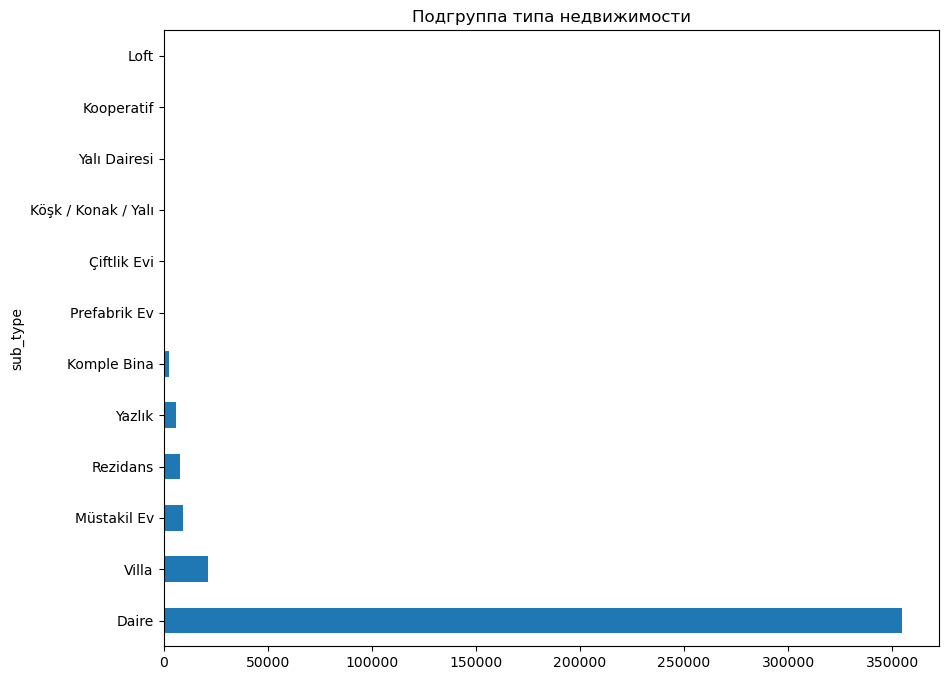

In [47]:
# Подтип недвижимости
print(df['sub_type'].value_counts())
df['sub_type'].value_counts(normalize=False).plot.barh(figsize=(10, 8))
plt.title('Подгруппа типа недвижимости')

Text(0.5, 1.0, 'Виды объявлений')

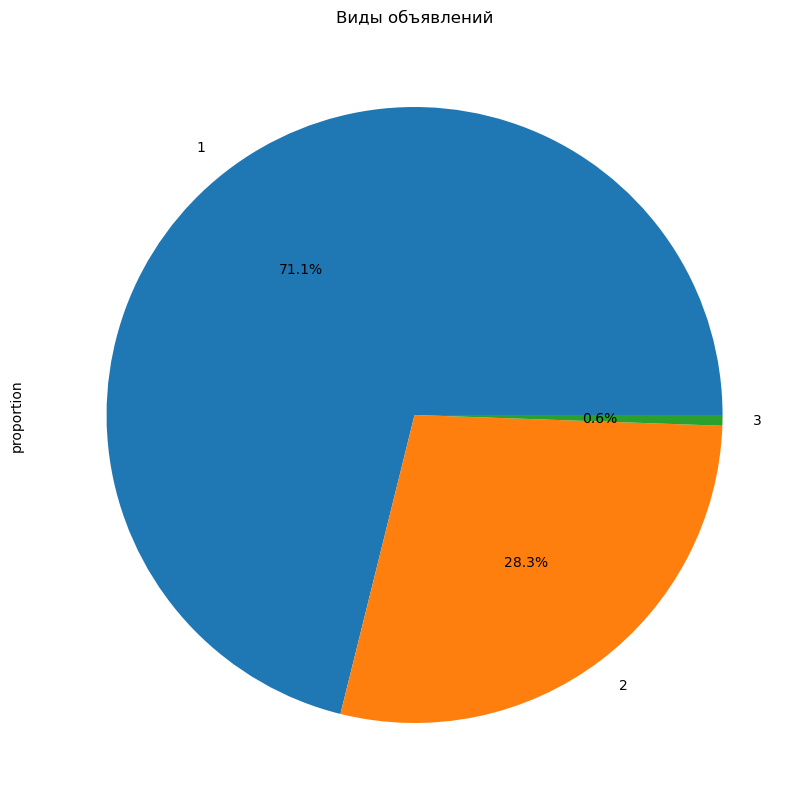

In [49]:
# Випы объявлений
df['listing_type'].value_counts(normalize=True).plot.pie(figsize=(15, 10), autopct='%1.1f%%')
plt.title('Виды объявлений')

In [51]:
color_1 = cm.get_cmap('RdBu')(df['building_age'].value_counts(normalize=True))

Text(0.5, 1.0, 'Возраст недвижимости')

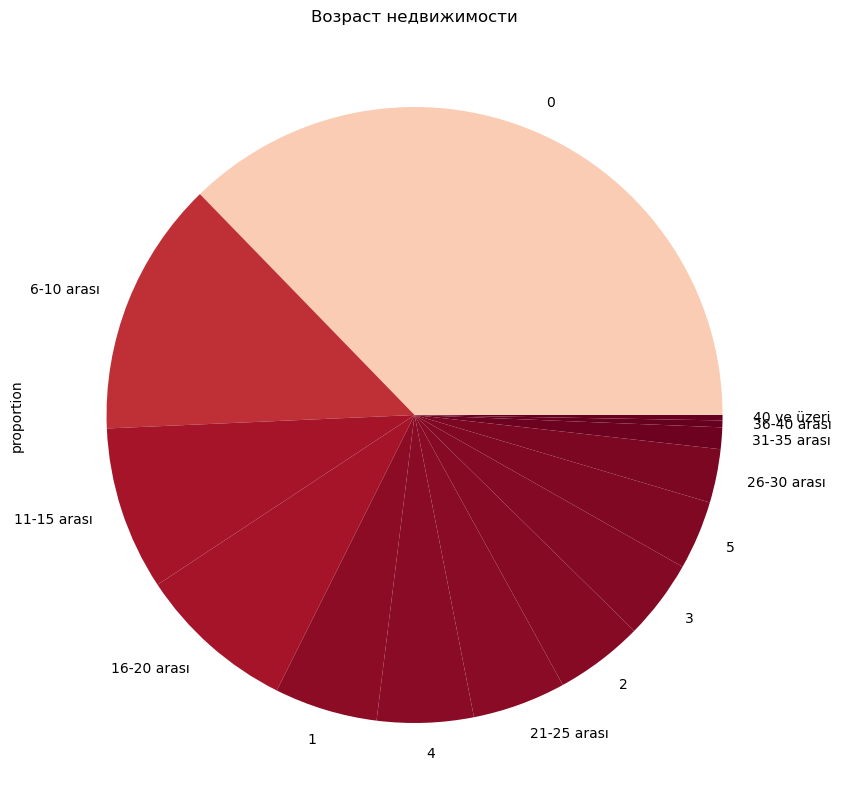

In [53]:
# Возраст зданий
df['building_age'].value_counts(normalize=True).plot.pie(figsize=(15, 10), colors=color_1)
plt.title('Возраст недвижимости')

In [55]:
color_2 = cm.get_cmap('viridis')(df['building_age'].value_counts(normalize=True))

Text(0.5, 1.0, 'Количество этажей')

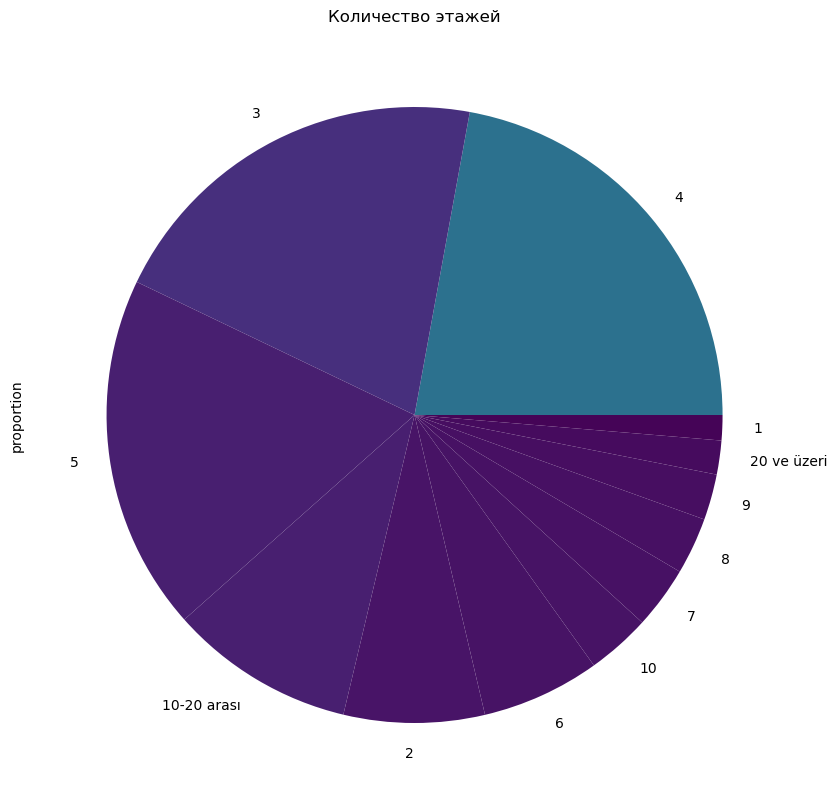

In [57]:
# Количество этажей
df['total_floor_count'].value_counts(normalize=True).plot.pie(figsize=(15, 10), colors=color_2)
plt.title('Количество этажей')

Text(0.5, 1.0, 'Количество этажей')

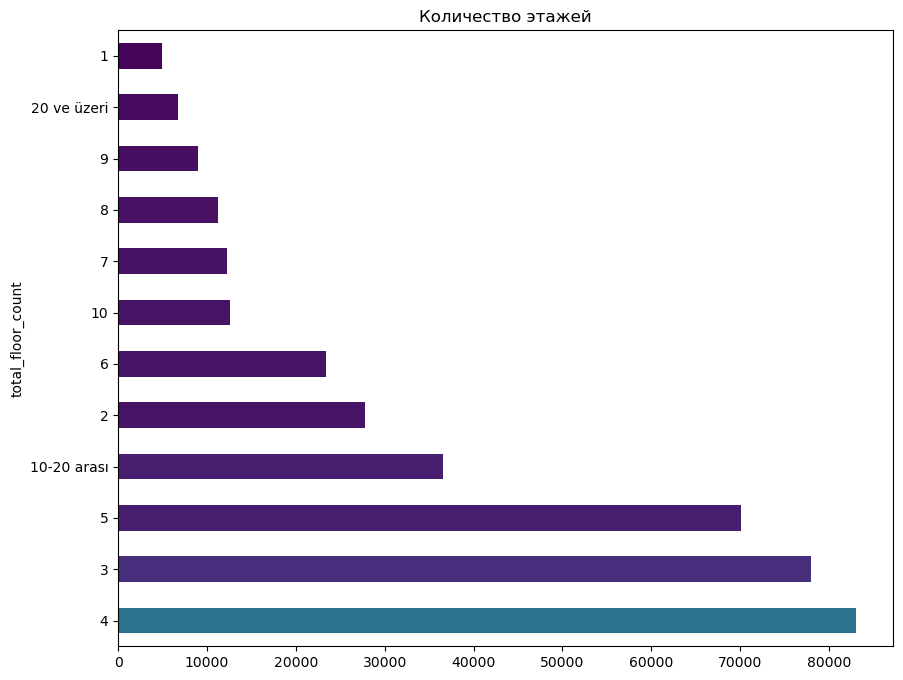

In [59]:
# Количество этажей
df['total_floor_count'].value_counts(normalize=False).plot.barh(figsize=(10, 8), color=color_2)
plt.title('Количество этажей')

In [61]:
color_3 = cm.get_cmap('coolwarm')(df['building_age'].value_counts(normalize=True))

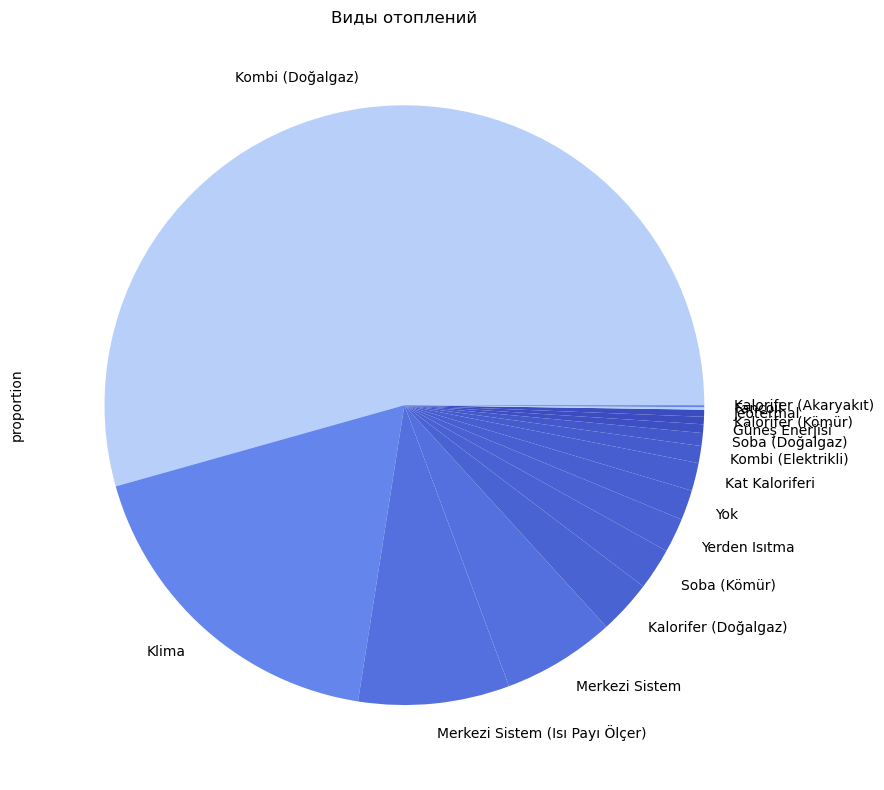

In [63]:
# Випы отоплений
df['heating_type'].value_counts(normalize=True).plot.pie(figsize=(12, 8), colors=color_3)
plt.title("Виды отоплений")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Виды отоплений')

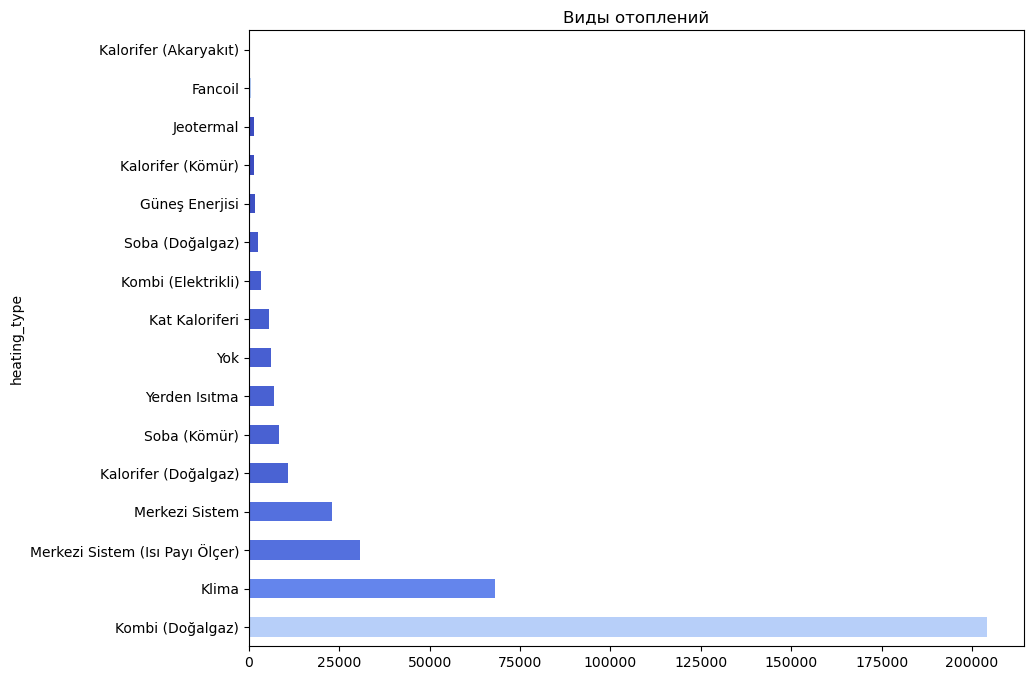

In [65]:
# Виды отоплений
df['heating_type'].value_counts(normalize=False).plot.barh(figsize=(10, 8), color=color_3)
plt.title('Виды отоплений')

Text(0.5, 1.0, 'Валюта недвижимости')

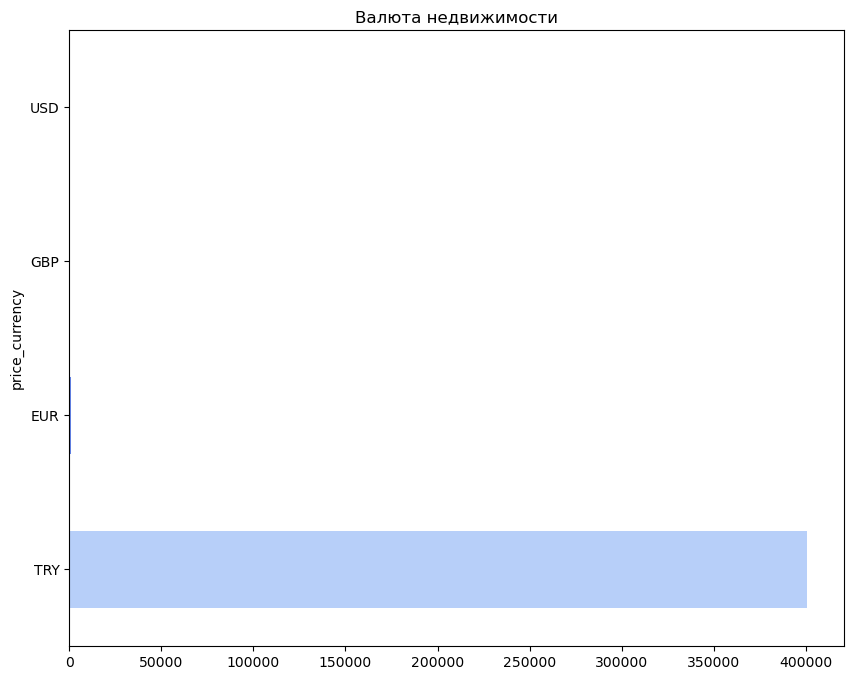

In [67]:
df['price_currency'].value_counts(normalize=False).plot.barh(figsize=(10, 8), color=color_3)
plt.title('Валюта недвижимости')

#### Предобработка данных, замена и удаление пустых значений

In [453]:
df.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


In [455]:
# удаляем ненужные столбцы
del_columns = ['id', 'type', 'furnished', 'start_date', 'end_date', 'floor_no']
df_nv = df.drop(columns=del_columns)
df_nv.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,price_currency
0,Rezidans,2,30,0,20 ve üzeri,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,Daire,1,14,0,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,Daire,1,30,0,1,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,Rezidans,1,30,3,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,Rezidans,1,30,0,20 ve üzeri,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY


In [457]:
df_nv.isna().sum()

sub_type                  0
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
room_count                0
size                 146006
address                   0
heating_type          27970
price                   715
price_currency          715
dtype: int64

#### Заполнение пустых значений

In [460]:
mode_butling_age = df_nv['building_age'].mode()[0]
df_nv['building_age'].fillna(mode_butling_age, inplace=True)

In [462]:
mode_floor = df_nv['total_floor_count'].mode()[0]
df_nv['total_floor_count'].fillna(mode_floor, inplace=True)

In [464]:
mode_heating = df_nv['heating_type'].mode()[0]
df_nv['heating_type'].fillna(mode_heating, inplace=True)

In [466]:
df_nv.dropna(subset='price_currency', inplace=True)
df_nv['price_currency'].value_counts()

price_currency
TRY    400677
EUR       922
GBP       621
USD       552
Name: count, dtype: int64

In [467]:
df_nv = df_nv.loc[df_nv['price_currency'] == 'TRY']
df_nv['price_currency'].value_counts()

price_currency
TRY    400677
Name: count, dtype: int64

In [469]:
df_nv = df_nv.drop(columns='price_currency')

In [472]:
size_mean = df_nv['size'].mean()
df_nv['size'].fillna(round(size_mean, 0), inplace=True)

In [474]:
df_nv['listing_type'].value_counts()

listing_type
1    284496
2    113948
3      2233
Name: count, dtype: int64

In [476]:
df_nv = df_nv.loc[df_nv['listing_type'] != 3]
df_nv['listing_type'].value_counts()

listing_type
1    284496
2    113948
Name: count, dtype: int64

#### Замена категориальных значений на численные

In [479]:
df_nv['sub_type'].unique()

array(['Rezidans', 'Daire', 'Villa', 'Müstakil Ev', 'Kooperatif',
       'Yazlık', 'Komple Bina', 'Prefabrik Ev', 'Köşk / Konak / Yalı',
       'Çiftlik Evi', 'Yalı Dairesi', 'Loft'], dtype=object)

In [481]:
# заменяем под тип недвижимлсти
df_nv['sub_type_name'] = df_nv['sub_type']
df_nv['sub_type'] = df_nv['sub_type'].map({
    'Rezidans':0 , 
    'Daire':1, 
    'Villa':2, 
    'Müstakil Ev':3, 
    'Kooperatif':4,
    'Yazlık':5, 
    'Komple Bina':6,
    'Prefabrik Ev':7,
    'Köşk / Konak / Yalı':8,
    'Çiftlik Evi':9,
    'Yalı Dairesi':10,
    'Loft':11})
df_nv.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name
0,0,2,30,0,20 ve üzeri,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,Rezidans
1,1,1,14,0,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,Daire
2,1,1,30,0,1,2+1,189.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,Daire
3,0,1,30,3,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,Rezidans
4,0,1,30,0,20 ve üzeri,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,Rezidans


In [484]:
# заменяем количество комнат на числа
def room_count_f(room):
    if room in '+' or room in '0+0':
        return 1
    f,s = room.split('+')
    return int(f) + int(s)

In [486]:
%%time
df_nv['room_count'] = [room_count_f(room) for room in df_nv['room_count']] 
df_nv.head()

CPU times: total: 328 ms
Wall time: 332 ms


,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name
0,0,2,30,0,20 ve üzeri,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,Rezidans
1,1,1,14,0,20 ve üzeri,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,Daire
2,1,1,30,0,1,3,189.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,Daire
3,0,1,30,3,20 ve üzeri,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,Rezidans
4,0,1,30,0,20 ve üzeri,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,Rezidans


In [488]:
df_nv['building_age'].unique()
random.seed = 5

In [491]:
# заменяем возраст зданий на число
def building_age_f(room: str):
    if str(room) in 'nan':
        return room
    elif room in '6-10 arası':
        return random.randint(6, 10)
    elif room in '11-15 arası':
        return random.randint(11, 15)
    elif room in '16-20 arası':
        return random.randint(16, 20)
    elif room in '21-25 arası':
        return random.randint(21, 25)
    elif room in '26-30 arası':
        return random.randint(26, 30)
    elif room in '31-35 arası':
        return random.randint(31, 35)
    elif room in '36-40 arası':
        return random.randint(36, 40)
    elif room in '40 ve üzeri':
        return 40
    return room

In [492]:
%%time
df_nv['building_age'] = [building_age_f(age) for age in df_nv['building_age']] 
df_nv.head()

CPU times: total: 672 ms
Wall time: 745 ms


,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name
0,0,2,30,9,20 ve üzeri,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,Rezidans
1,1,1,14,6,20 ve üzeri,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,Daire
2,1,1,30,6,1,3,189.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,Daire
3,0,1,30,27,20 ve üzeri,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,Rezidans
4,0,1,30,6,20 ve üzeri,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,Rezidans


In [495]:
df_nv['total_floor_count'].unique()

array(['20 ve üzeri', '1', '10-20 arası', '4', '2', '3', '8', '7', '5',
       '10', '6', '9'], dtype=object)

In [496]:
# заменяем возраст зданий на число
def total_floor_f(floor: str):
    if str(floor) in 'nan':
        return floor
    if floor in '10-20 arası':
        return random.randint(10, 20)
    elif floor in '20 ve üzeri':
        return 20
    return int(str(floor))

In [497]:
%%time
df_nv['total_floor_count'] = [total_floor_f(floor) for floor in df_nv['total_floor_count']] 
df_nv.head()

CPU times: total: 375 ms
Wall time: 375 ms


,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name
0,0,2,30,9,20,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,Rezidans
1,1,1,14,6,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,Daire
2,1,1,30,6,20,3,189.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,Daire
3,0,1,30,27,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,Rezidans
4,0,1,30,6,20,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,Rezidans


In [498]:
df_nv['total_floor_count'].unique()

array([20, 15,  4, 16, 14,  3, 11, 12,  8, 19, 10,  7, 18,  5, 17,  6, 13,
        9], dtype=int64)

In [506]:
columns = df_nv['address'].str.split('/', expand=True)

In [508]:
columns.columns = ['address_name', 'county', 'district']

In [512]:
df_ev = pd.concat([columns], axis = 1).drop(columns=['county', 'district'])

In [514]:
df_nv = pd.concat([df_nv, df_ev], axis = 1)

In [516]:
df_nv.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name,address_name
0,0,2,30,9,20,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,Rezidans,İstanbul
1,1,1,14,6,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,Daire,İstanbul
2,1,1,30,6,20,3,189.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,Daire,Tekirdağ
3,0,1,30,27,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,Rezidans,İstanbul
4,0,1,30,6,20,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,Rezidans,İstanbul


In [518]:
df_nv['address'] = df_nv['address_name']

In [520]:
df_nv['address'], _ = pd.factorize(df_nv['address'])

In [522]:
df_nv.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name,address_name
0,0,2,30,9,20,3,90.0,0,Fancoil,3500.0,Rezidans,İstanbul
1,1,1,14,6,20,1,43.0,0,Fancoil,490000.0,Daire,İstanbul
2,1,1,30,6,20,3,189.0,1,Fancoil,155000.0,Daire,Tekirdağ
3,0,1,30,27,20,7,450.0,0,Fancoil,32500000.0,Rezidans,İstanbul
4,0,1,30,6,20,3,90.0,0,Fancoil,1450000.0,Rezidans,İstanbul


In [525]:
df_nv['heating_type'].unique()

array(['Fancoil', 'Yok', 'Kalorifer (Doğalgaz)', 'Kalorifer (Kömür)',
       'Kombi (Elektrikli)', 'Klima', 'Kombi (Doğalgaz)',
       'Merkezi Sistem (Isı Payı Ölçer)', 'Merkezi Sistem',
       'Soba (Kömür)', 'Yerden Isıtma', 'Soba (Doğalgaz)',
       'Güneş Enerjisi', 'Kalorifer (Akaryakıt)', 'Jeotermal',
       'Kat Kaloriferi'], dtype=object)

In [527]:
# заменяем тип отопления
df_nv['heating_type_name'] = df_nv['heating_type']
df_nv['heating_type'] = df_nv['heating_type'].map({'Fancoil':0, 'Yok':1, 'Kalorifer (Doğalgaz)':2, 'Kalorifer (Kömür)':3,
       'Kombi (Elektrikli)':4, 'Klima':5, 'Kombi (Doğalgaz)':6,
       'Merkezi Sistem (Isı Payı Ölçer)':7, 'Merkezi Sistem':8,
       'Soba (Kömür)':9, 'Yerden Isıtma':10, 'Soba (Doğalgaz)':11,
       'Güneş Enerjisi':12, 'Kalorifer (Akaryakıt)':13, 'Jeotermal':14,
       'Kat Kaloriferi':15})
df_nv.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name,address_name,heating_type_name
0,0,2,30,9,20,3,90.0,0,0,3500.0,Rezidans,İstanbul,Fancoil
1,1,1,14,6,20,1,43.0,0,0,490000.0,Daire,İstanbul,Fancoil
2,1,1,30,6,20,3,189.0,1,0,155000.0,Daire,Tekirdağ,Fancoil
3,0,1,30,27,20,7,450.0,0,0,32500000.0,Rezidans,İstanbul,Fancoil
4,0,1,30,6,20,3,90.0,0,0,1450000.0,Rezidans,İstanbul,Fancoil


In [529]:
# проверяем результаты
df_nv.isna().sum()

sub_type             0
listing_type         0
tom                  0
building_age         0
total_floor_count    0
room_count           0
size                 0
address              0
heating_type         0
price                0
sub_type_name        0
address_name         0
heating_type_name    0
dtype: int64

In [531]:
df_nv.describe().T

,count,mean,std,min,25%,50%,75%,max
sub_type,398444.0,1.203246,8.633035e-01,0.0,1.0,1.0,1.0,1.100000e+01
listing_type,398444.0,1.285982,4.518816e-01,1.0,1.0,1.0,2.0,2.000000e+00
tom,398444.0,56.878548,4.423798e+01,0.0,29.0,40.0,90.0,1.800000e+02
building_age,398444.0,13.619071,8.724005e+00,6.0,8.0,10.0,17.0,4.000000e+01
total_floor_count,398444.0,6.887909,4.915332e+00,3.0,4.0,5.0,8.0,2.000000e+01
room_count,398444.0,3.678979,1.135912e+00,1.0,3.0,4.0,4.0,2.000000e+01
size,398444.0,189.262002,4.466775e+03,1.0,100.0,150.0,189.0,9.090390e+05
address,398444.0,9.753506,1.302790e+01,0.0,0.0,6.0,12.0,8.100000e+01
heating_type,398444.0,6.154546,1.883074e+00,0.0,6.0,6.0,6.0,1.500000e+01
price,398444.0,355991.933459,4.834395e+06,-250.0,2550.0,200000.0,345000.0,2.000000e+09


In [533]:
%%time
df_nv.to_csv('real_estate_df_clear_v3.1.csv', index=False)

CPU times: total: 1.77 s
Wall time: 1.77 s


#### Обработка аномальных значений

In [655]:
df_nv=pd.read_csv("real_estate_df_clear_v3.1.csv")
df_nv.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name,address_name,heating_type_name
0,0,2,30,9,20,3,90.0,0,0,3500.0,Rezidans,İstanbul,Fancoil
1,1,1,14,6,20,1,43.0,0,0,490000.0,Daire,İstanbul,Fancoil
2,1,1,30,6,20,3,189.0,1,0,155000.0,Daire,Tekirdağ,Fancoil
3,0,1,30,27,20,7,450.0,0,0,32500000.0,Rezidans,İstanbul,Fancoil
4,0,1,30,6,20,3,90.0,0,0,1450000.0,Rezidans,İstanbul,Fancoil


In [656]:
df_nv.describe().T

,count,mean,std,min,25%,50%,75%,max
sub_type,398444.0,1.203246,8.633035e-01,0.0,1.0,1.0,1.0,1.100000e+01
listing_type,398444.0,1.285982,4.518816e-01,1.0,1.0,1.0,2.0,2.000000e+00
tom,398444.0,56.878548,4.423798e+01,0.0,29.0,40.0,90.0,1.800000e+02
building_age,398444.0,13.619071,8.724005e+00,6.0,8.0,10.0,17.0,4.000000e+01
total_floor_count,398444.0,6.887909,4.915332e+00,3.0,4.0,5.0,8.0,2.000000e+01
room_count,398444.0,3.678979,1.135912e+00,1.0,3.0,4.0,4.0,2.000000e+01
size,398444.0,189.262002,4.466775e+03,1.0,100.0,150.0,189.0,9.090390e+05
address,398444.0,9.753506,1.302790e+01,0.0,0.0,6.0,12.0,8.100000e+01
heating_type,398444.0,6.154546,1.883074e+00,0.0,6.0,6.0,6.0,1.500000e+01
price,398444.0,355991.933459,4.834395e+06,-250.0,2550.0,200000.0,345000.0,2.000000e+09


In [657]:
df_nv[df_nv["price"] <= 100].count()

sub_type             175
listing_type         175
tom                  175
building_age         175
total_floor_count    175
room_count           175
size                 175
address              175
heating_type         175
price                175
sub_type_name        175
address_name         175
heating_type_name    175
dtype: int64

In [659]:
def price_df(price):
    if price <= 100:
        return None
    return price

In [661]:
# заменим выбросы средним значением
df_nv['price'] = df_nv['price'].apply(price_df)

In [664]:
df_nv.dropna(inplace=True)

In [667]:
df_nv.isna().sum()

sub_type             0
listing_type         0
tom                  0
building_age         0
total_floor_count    0
room_count           0
size                 0
address              0
heating_type         0
price                0
sub_type_name        0
address_name         0
heating_type_name    0
dtype: int64

In [669]:
df_nv.describe().T

,count,mean,std,min,25%,50%,75%,max
sub_type,398269.0,1.203111,8.628531e-01,0.0,1.0,1.0,1.0,1.100000e+01
listing_type,398269.0,1.285767,4.517794e-01,1.0,1.0,1.0,2.0,2.000000e+00
tom,398269.0,56.868051,4.422847e+01,0.0,29.0,40.0,90.0,1.800000e+02
building_age,398269.0,13.619945,8.724346e+00,6.0,8.0,10.0,17.0,4.000000e+01
total_floor_count,398269.0,6.887963,4.915357e+00,3.0,4.0,5.0,8.0,2.000000e+01
room_count,398269.0,3.679458,1.135513e+00,1.0,3.0,4.0,4.0,2.000000e+01
size,398269.0,189.286362,4.467756e+03,1.0,100.0,150.0,189.0,9.090390e+05
address,398269.0,9.753466,1.302735e+01,0.0,0.0,6.0,12.0,8.100000e+01
heating_type,398269.0,6.154717,1.883213e+00,0.0,6.0,6.0,6.0,1.500000e+01
price,398269.0,356148.332727,4.835452e+06,103.0,2600.0,200000.0,345000.0,2.000000e+09


In [671]:
%%time
df_nv.to_csv('real_estate_df_clear_v3.1_c.csv', index=False)

CPU times: total: 1.62 s
Wall time: 1.64 s


In [6]:
df_nv=pd.read_csv("real_estate_df_clear_v3.1_c.csv")
df_nv.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name,address_name,heating_type_name
0,0,2,30,9,20,3,90.0,0,0,3500.0,Rezidans,İstanbul,Fancoil
1,1,1,14,6,20,1,43.0,0,0,490000.0,Daire,İstanbul,Fancoil
2,1,1,30,6,20,3,189.0,1,0,155000.0,Daire,Tekirdağ,Fancoil
3,0,1,30,27,20,7,450.0,0,0,32500000.0,Rezidans,İstanbul,Fancoil
4,0,1,30,6,20,3,90.0,0,0,1450000.0,Rezidans,İstanbul,Fancoil


In [7]:
df_nv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398269 entries, 0 to 398268
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_type           398269 non-null  int64  
 1   listing_type       398269 non-null  int64  
 2   tom                398269 non-null  int64  
 3   building_age       398269 non-null  int64  
 4   total_floor_count  398269 non-null  int64  
 5   room_count         398269 non-null  int64  
 6   size               398269 non-null  float64
 7   address            398269 non-null  int64  
 8   heating_type       398269 non-null  int64  
 9   price              398269 non-null  float64
 10  sub_type_name      398269 non-null  object 
 11  address_name       398269 non-null  object 
 12  heating_type_name  398269 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 39.5+ MB


## Тепловая карта

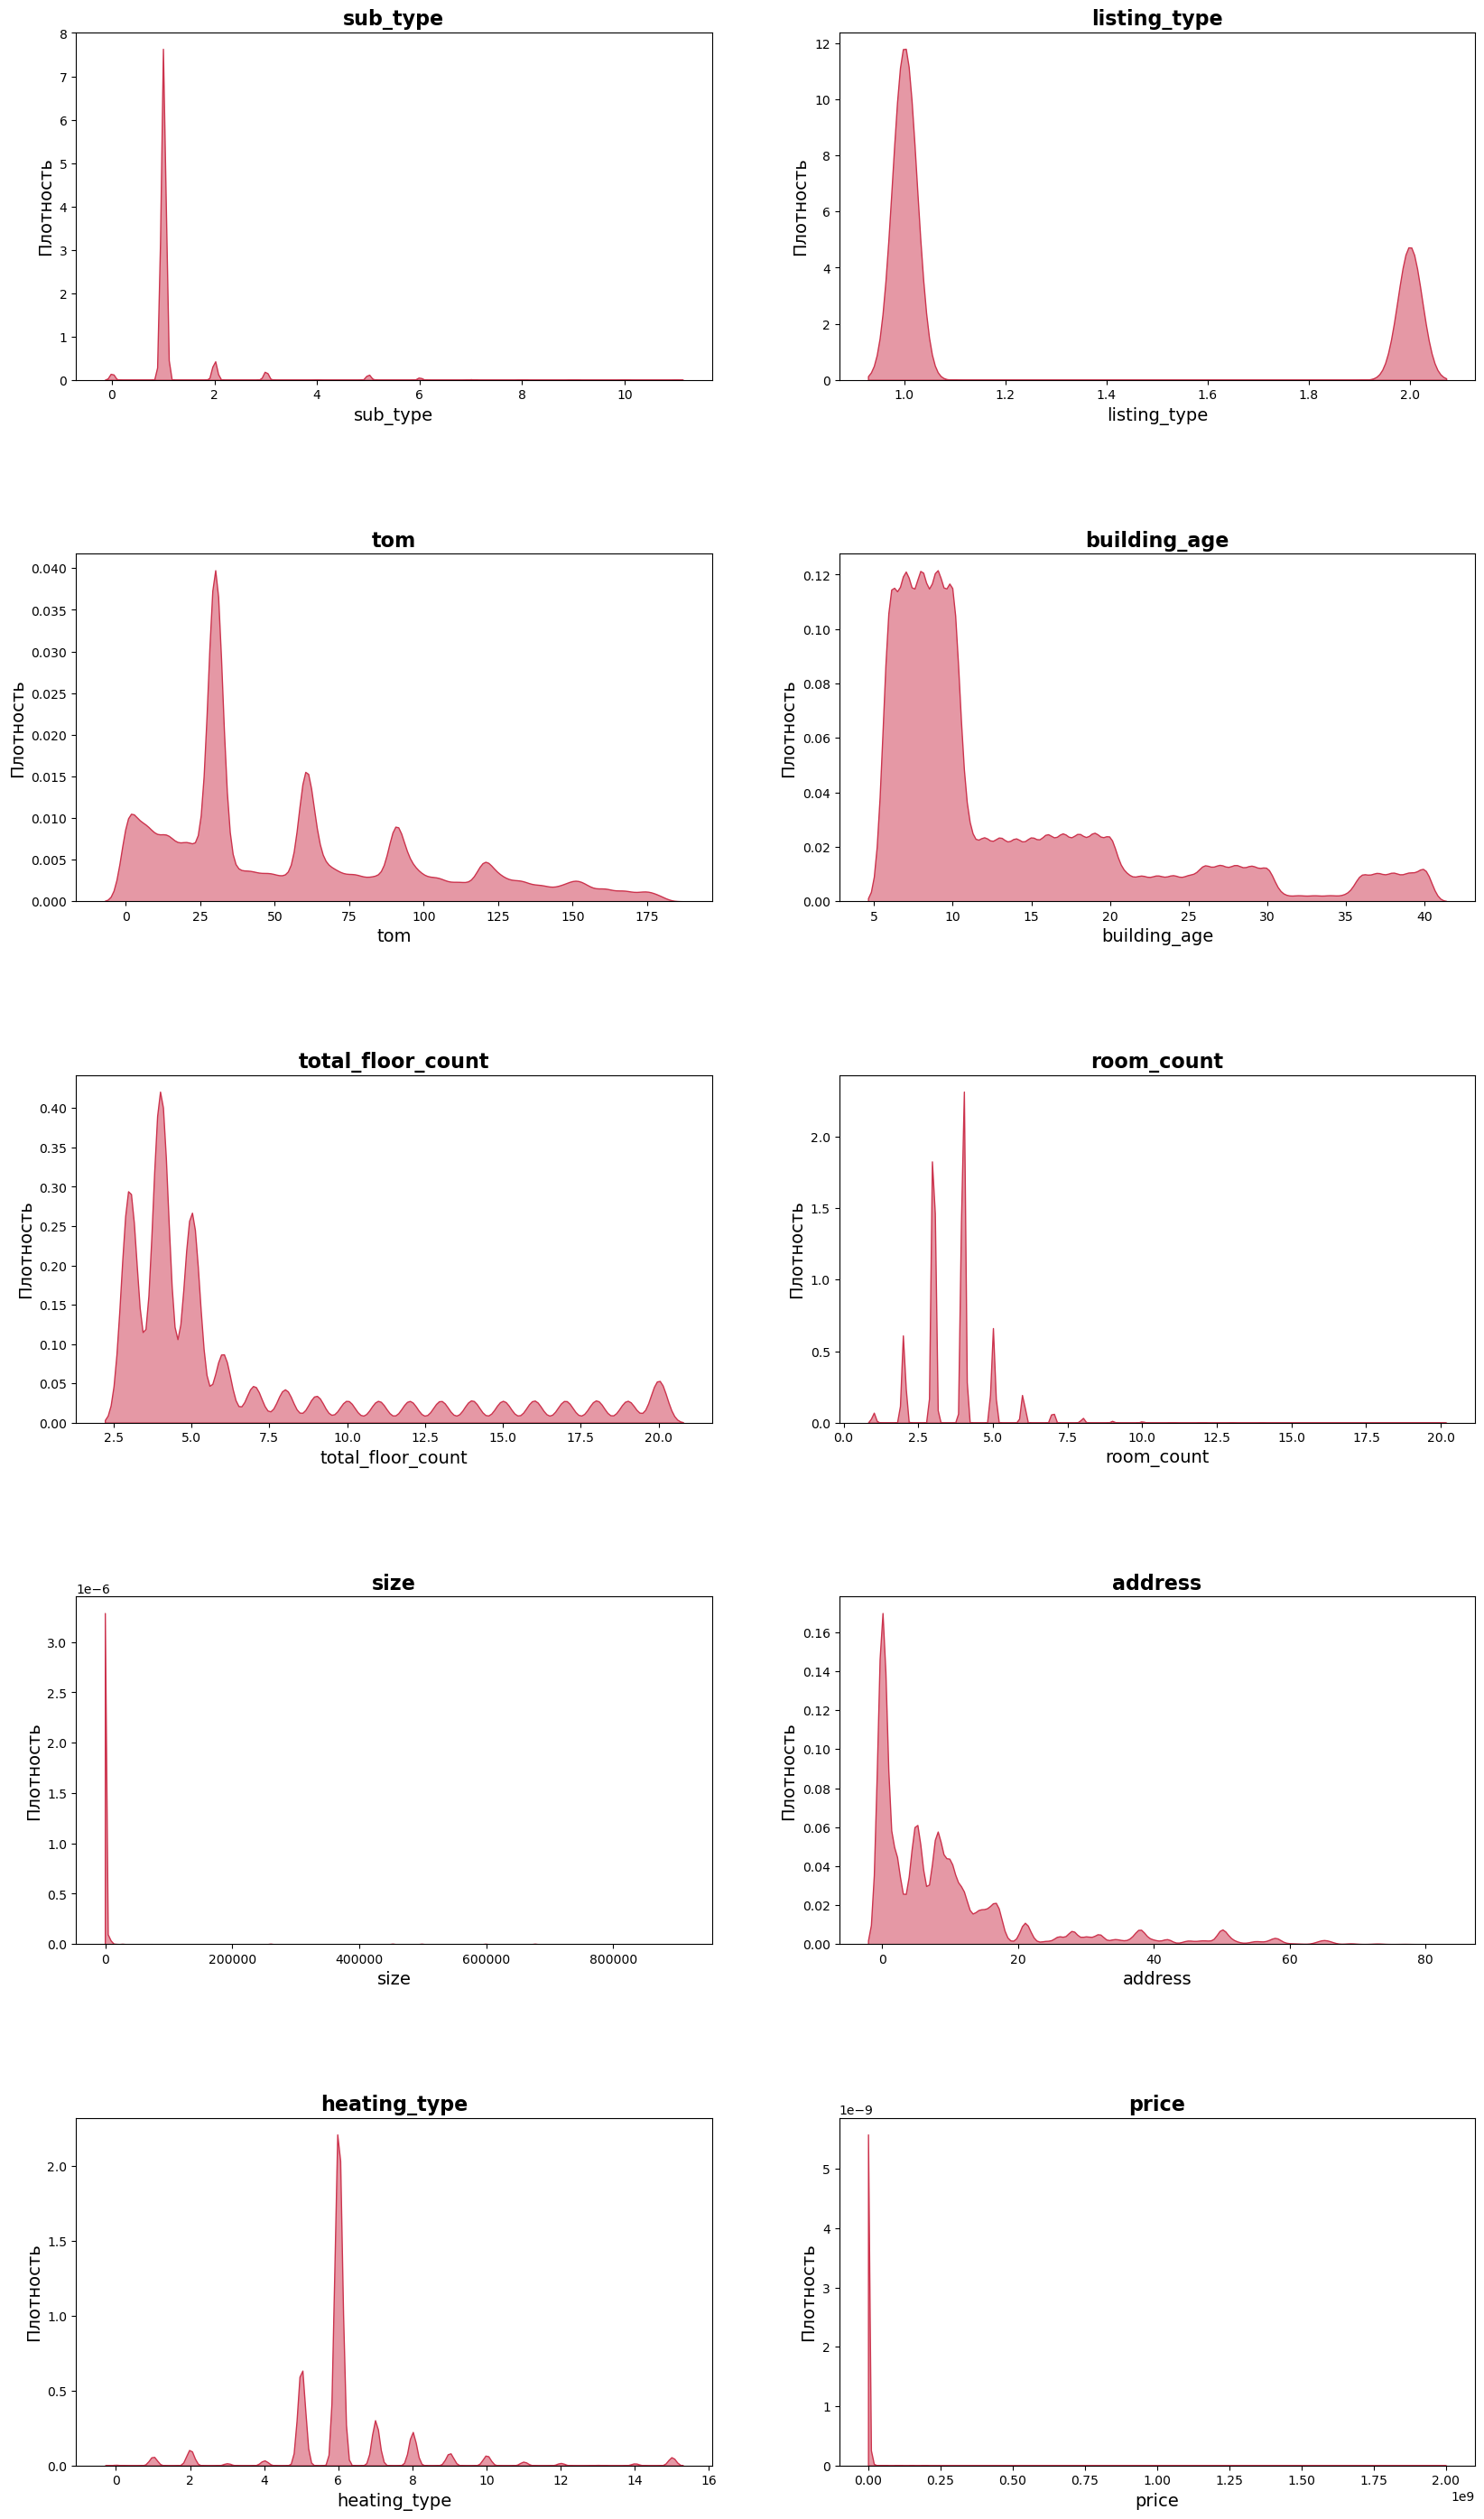

CPU times: total: 26.2 s
Wall time: 20.1 s


In [24]:
%%time
fig, axes = plt.subplots(5,2, figsize = (20,35))
plt.subplots_adjust(hspace=0.5)
columns = df_nv.drop(columns=['sub_type_name', 'address_name', 'heating_type_name']).columns

for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df_nv,
                x = column,
                fill = True,
                alpha = 0.5,
                bw_adjust=.7,
                color = [0.8, 0.2, 0.3],
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

CPU times: total: 266 ms
Wall time: 295 ms


array([[<Axes: title={'center': 'sub_type'}>,
        <Axes: title={'center': 'listing_type'}>,
        <Axes: title={'center': 'tom'}>],
       [<Axes: title={'center': 'building_age'}>,
        <Axes: title={'center': 'total_floor_count'}>,
        <Axes: title={'center': 'room_count'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'heating_type'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

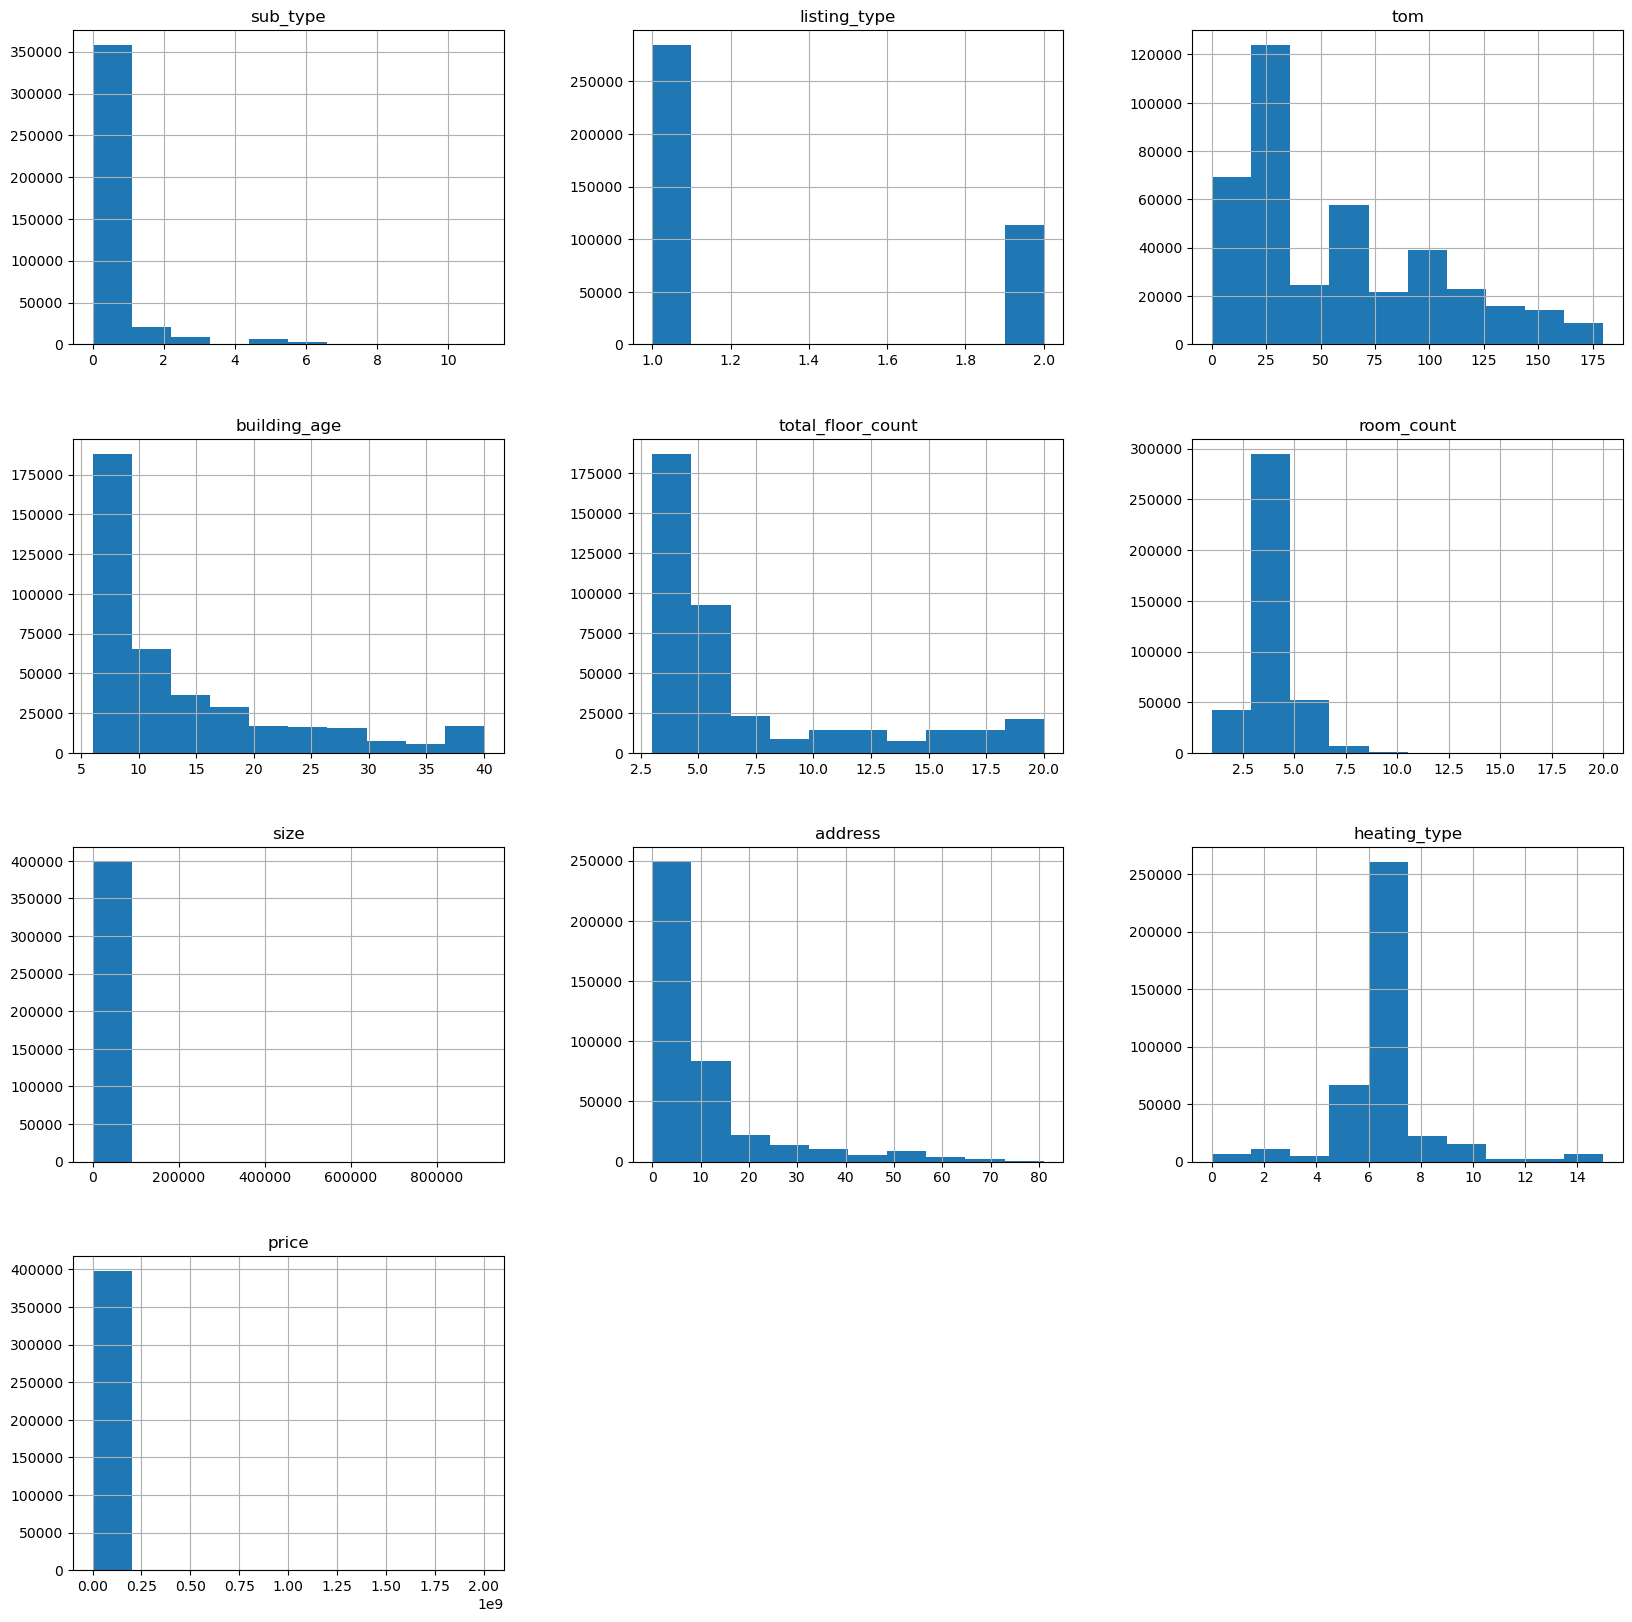

In [28]:
%%time
df_nv.hist(figsize=(20, 20))

In [30]:
corr = df_nv.drop(columns=['sub_type_name', 'address_name', 'heating_type_name']).corr()
corr

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price
sub_type,1.000000,-0.104826,0.046129,0.008518,0.065097,0.109854,0.014699,-0.014126,0.010949,0.057110
listing_type,-0.104826,1.000000,-0.131127,0.126784,0.014288,-0.101303,-0.006380,-0.027604,-0.015741,-0.044361
tom,0.046129,-0.131127,1.000000,-0.019524,0.011574,0.054164,-0.001784,0.017400,0.004027,0.011906
building_age,0.008518,0.126784,-0.019524,1.000000,0.001825,-0.014160,0.007494,-0.037040,0.009569,0.003762
total_floor_count,0.065097,0.014288,0.011574,0.001825,1.000000,0.033897,0.006185,-0.038050,0.049548,0.009390
room_count,0.109854,-0.101303,0.054164,-0.014160,0.033897,1.000000,0.040419,0.058203,0.041781,0.059981
size,0.014699,-0.006380,-0.001784,0.007494,0.006185,0.040419,1.000000,-0.000711,0.006400,0.004479
address,-0.014126,-0.027604,0.017400,-0.037040,-0.038050,0.058203,-0.000711,1.000000,0.054703,-0.018129
heating_type,0.010949,-0.015741,0.004027,0.009569,0.049548,0.041781,0.006400,0.054703,1.000000,0.004835
price,0.057110,-0.044361,0.011906,0.003762,0.009390,0.059981,0.004479,-0.018129,0.004835,1.000000


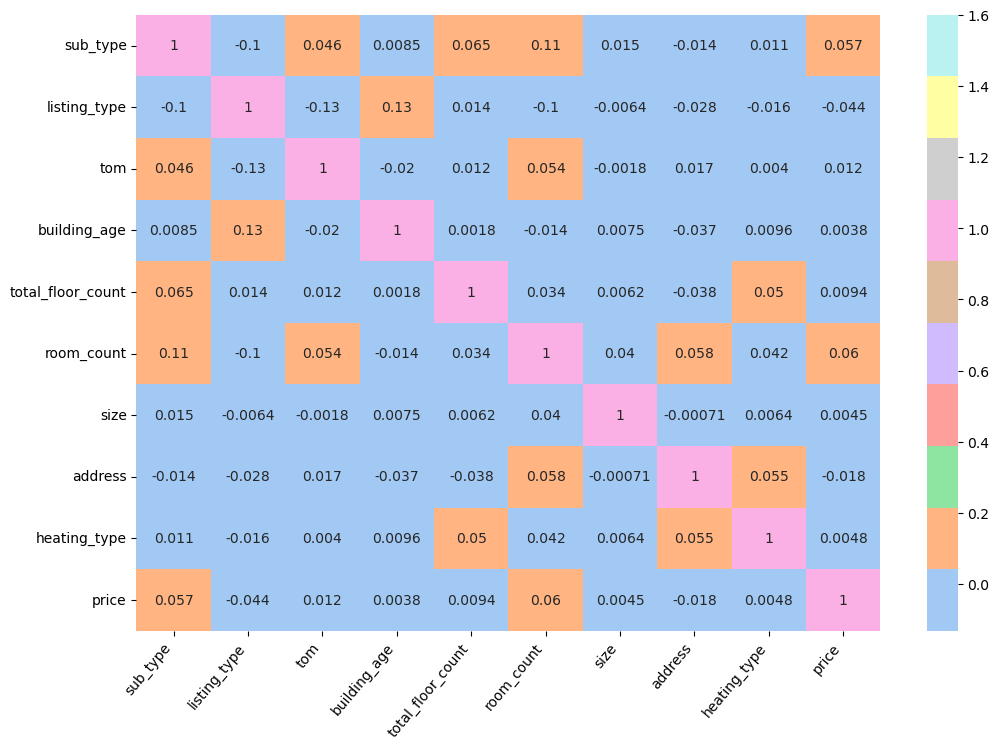

In [32]:
plt.figure(figsize = (12, 8))
sns.heatmap(corr, cmap = sns.color_palette("pastel", as_cmap=True), annot = True, vmax = 1.6);
plt.xticks(rotation=50, ha='right');

#### Вывод: на тепловой карте имеется достаточно слабые зависимости. Количество комнат коррелирует с типом недвижимости 0.11, возраст здания с типом объявления 0.13.

## Обучение моделей - Ансамблевые методы

In [12]:
df_nv=pd.read_csv("real_estate_df_clear_v3.1_c.csv")
df_nv.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price,sub_type_name,address_name,heating_type_name
0,0,2,30,9,20,3,90.0,0,0,3500.0,Rezidans,İstanbul,Fancoil
1,1,1,14,6,20,1,43.0,0,0,490000.0,Daire,İstanbul,Fancoil
2,1,1,30,6,20,3,189.0,1,0,155000.0,Daire,Tekirdağ,Fancoil
3,0,1,30,27,20,7,450.0,0,0,32500000.0,Rezidans,İstanbul,Fancoil
4,0,1,30,6,20,3,90.0,0,0,1450000.0,Rezidans,İstanbul,Fancoil


In [13]:
df_nv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398269 entries, 0 to 398268
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_type           398269 non-null  int64  
 1   listing_type       398269 non-null  int64  
 2   tom                398269 non-null  int64  
 3   building_age       398269 non-null  int64  
 4   total_floor_count  398269 non-null  int64  
 5   room_count         398269 non-null  int64  
 6   size               398269 non-null  float64
 7   address            398269 non-null  int64  
 8   heating_type       398269 non-null  int64  
 9   price              398269 non-null  float64
 10  sub_type_name      398269 non-null  object 
 11  address_name       398269 non-null  object 
 12  heating_type_name  398269 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 39.5+ MB


In [8]:
df_md = df_nv[['listing_type', 'tom', 'building_age', 'total_floor_count', 'room_count', 'size', 'address', 'heating_type', 'price']]
df_md.head()

,listing_type,tom,building_age,total_floor_count,room_count,size,address,heating_type,price
0,2,30,9,20,3,90.0,0,0,3500.0
1,1,14,6,20,1,43.0,0,0,490000.0
2,1,30,6,20,3,189.0,1,0,155000.0
3,1,30,27,20,7,450.0,0,0,32500000.0
4,1,30,6,20,3,90.0,0,0,1450000.0


In [9]:
X = df_md

In [10]:
y = df_nv['sub_type']
y.value_counts()

sub_type
1     350698
2      20703
3       9437
0       7247
5       5865
6       2572
7        672
9        516
8        281
10       174
4         70
11        34
Name: count, dtype: int64

### Модели классификации и регрессии

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=12)

#### Стекинг - StackingClassifier 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [24]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=15, random_state=12)),
    ('knn', KNeighborsClassifier())
]

In [25]:
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [27]:
%%time
sclf.fit(X_train, y_train)

CPU times: total: 1min 25s
Wall time: 1min 1s


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=15,
                                                       random_state=12)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [28]:
sclf.score(X_valid, y_valid)

0.9334789631824307

In [29]:
y_pred_sclf = sclf.predict(X_valid)

#### StackingRegressor

In [43]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor

In [44]:
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]

In [45]:
sreg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=15, random_state=12))

In [46]:
%%time
sreg.fit(X_train, y_train)

CPU times: total: 5min 20s
Wall time: 5min 14s


StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('svr', LinearSVR(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=15,
                                                        random_state=12))

In [47]:
sreg.score(X_valid, y_valid)

-1.3582003887179392

In [48]:
y_pred_sreg = sreg.predict(X_valid)

_____

#### Бэггинг - BaggingClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [49]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [50]:
# bclf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=12)

In [65]:
bclf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators=10, random_state=12)

In [66]:
%%time
bclf.fit(X_train, y_train)

CPU times: total: 5.61 s
Wall time: 5.59 s


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  random_state=12)

In [67]:
bclf.score(X_valid, y_valid)

0.9200458650329341

In [68]:
y_pred_bclf = bclf.predict(X_valid)

#### BaggingRegressor

In [54]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

In [55]:
# bregr = BaggingRegressor(estimator=LogisticRegression(), n_estimators=10, random_state=12)

In [61]:
bregr = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=None), n_estimators=10, random_state=12)

In [62]:
%%time
bregr.fit(X_train, y_train)

CPU times: total: 10.4 s
Wall time: 10.4 s


BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=12)

In [63]:
bregr.score(X_valid, y_valid)

0.4954220259584371

In [64]:
y_pred_bregr = bregr.predict(X_valid)

_____

#### Бустинг - AdaBoostClassifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [70]:
aclf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=10, learning_rate=0.1, random_state=12)

In [71]:
%%time
aclf.fit(X_train, y_train)

CPU times: total: 2.77 s
Wall time: 2.8 s


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=12)

In [72]:
aclf.score(X_valid, y_valid)

0.8810522175073862

In [73]:
y_pred_aclf = aclf.predict(X_valid)

#### AdaBoostRegressor

In [74]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [91]:
# aregr = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=200, learning_rate=0.1, random_state=12)

In [98]:
aregr = AdaBoostRegressor(random_state=12, n_estimators=100)

In [99]:
%%time
aregr.fit(X_train, y_train)

CPU times: total: 6.72 s
Wall time: 6.84 s


AdaBoostRegressor(n_estimators=100, random_state=12)

In [100]:
aregr.score(X_valid, y_valid)

-1.1555841726894074

In [101]:
y_pred_aregr = aregr.predict(X_valid)

_____

#### Градиентный бустинг - GradientBoostingClassifier

In [103]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
gclf = GradientBoostingClassifier(max_depth=2, n_estimators=100, random_state=0, learning_rate=1)

In [105]:
%%time
gclf.fit(X_train, y_train)

CPU times: total: 3min 55s
Wall time: 3min 55s


GradientBoostingClassifier(learning_rate=1, max_depth=2, random_state=0)

In [106]:
gclf.score(X_valid, y_valid)

0.7933730049129151

In [107]:
y_pred_gclf = gclf.predict(X_valid)

#### GradientBoostingRegressor

In [108]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [109]:
greg = GradientBoostingRegressor(max_depth=2, n_estimators=100, random_state=0, learning_rate=1)

In [110]:
%%time
greg.fit(X_train, y_train)

CPU times: total: 15.8 s
Wall time: 15.8 s


GradientBoostingRegressor(learning_rate=1, max_depth=2, random_state=0)

In [111]:
greg.score(X_valid, y_valid)

0.3338916769243512

In [112]:
y_pred_greg = greg.predict(X_valid)

### Сравнение моделей

#### Модели классификации

In [113]:
print('StackingClassifier \n' + classification_report(y_valid, y_pred_sclf))
print('-' * 53)

print('BaggingClassifier \n' + classification_report(y_valid, y_pred_bclf))
print('-' * 53)

print('AdaBoostClassifier \n' + classification_report(y_valid, y_pred_aclf))
print('-' * 53)

print('GradientBoostingClassifier \n' + classification_report(y_valid, y_pred_gclf))
print('-' * 53)

StackingClassifier 
              precision    recall  f1-score   support

           0       0.71      0.39      0.50      2182
           1       0.96      0.99      0.97    105269
           2       0.72      0.71      0.71      6154
           3       0.68      0.39      0.50      2806
           4       0.00      0.00      0.00        24
           5       0.55      0.31      0.40      1749
           6       0.92      0.76      0.83       789
           7       0.92      0.78      0.84       224
           8       0.80      0.44      0.56        85
           9       0.78      0.30      0.43       134
          10       1.00      0.09      0.17        53
          11       0.00      0.00      0.00        12

    accuracy                           0.93    119481
   macro avg       0.67      0.43      0.49    119481
weighted avg       0.93      0.93      0.93    119481

-----------------------------------------------------
BaggingClassifier 
              precision    recall  f1-sc

#### Модели регресии

In [114]:
log_cols = ['Regressor', "MSE", "R2 Score"]
log = pd.DataFrame(columns=log_cols)

In [115]:
log['Regressor'] = ['StackingRegressor', 'BaggingRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor']
log['MSE'] = [mean_squared_error(y_valid, y_pred_sreg),
             mean_squared_error(y_valid, y_pred_bregr),
             mean_squared_error(y_valid, y_pred_aregr),
             mean_squared_error(y_valid, y_pred_greg)]
log['R2 Score'] = [r2_score(y_valid, y_pred_sreg),
                  r2_score(y_valid, y_pred_bregr),
                  r2_score(y_valid, y_pred_aregr),
                  r2_score(y_valid, y_pred_greg)]

In [116]:
log.head()

,Regressor,MSE,R2 Score
0,StackingRegressor,1.754216,-1.358200
1,BaggingRegressor,0.375345,0.495422
2,AdaBoostRegressor,1.603494,-1.155584
3,GradientBoostingRegressor,0.495504,0.333892


##### Сохранение самой лучшей модели

In [118]:
import pickle
# Сохранение модели
with open('model_bregr_v1.pkl', 'wb') as file:
    pickle.dump(bregr, file)